# Papcorns Data Scientist Task - Getting Started

This notebook will help you get started with the Papcorns data scientist technical assessment. We'll show you how to:
1. Install requirements and do the imports
2. Connect to the SQLite database
3. Load the data into pandas DataFrames

First, let's import the required libraries:

## Installing Requirements

Let's install the required libraries:

In [1]:
#!pip install -r requirements.txt
# I will filter warnings for better outputs.
import warnings
warnings.filterwarnings("ignore")

## Imports

Let's do the imports:

In [2]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set plotting style
# plt.style.use('seaborn') This code gives error so i will not use.
sns.set_palette('deep')

## Connecting to the Database

Let's establish a connection to the SQLite database:

In [3]:
# Connect to the SQLite database
conn = sqlite3.connect('papcorns.sqlite')

## Exploring the Data Structure

Let's look at the structure of our tables:

In [4]:
# Load users table
users_df = pd.read_sql_query("SELECT * FROM users;", conn)
print("Users table preview:")
display(users_df)

# Load events table
events_df = pd.read_sql_query("SELECT * FROM user_events;", conn)
print("\nUser events table preview:")
display(events_df)

Users table preview:


,id,created_at,attribution_source,country,name
0,1,2024-05-07T00:00:00,instagram,US,Eve Brown
1,2,2024-10-12T00:00:00,instagram,NL,Frank Moore
2,3,2024-10-15T00:00:00,tiktok,TR,Ivy Anderson
3,4,2024-08-28T00:00:00,tiktok,TR,Alice Brown
4,5,2024-04-03T00:00:00,organic,NL,Bob Moore
...,...,...,...,...,...
997,998,2025-02-01T00:00:00,instagram,TR,Bob Davis
998,999,2024-12-24T00:00:00,organic,NL,Charlie Davis
999,1000,2025-02-13T00:00:00,organic,NL,Jack Anderson
1000,1001,2025-02-16T00:00:00,instagram,US,Bruce Wayne



User events table preview:


,id,created_at,user_id,event_name,amount_usd
0,1,2024-05-07T00:00:00,1,app_install,NaN
1,2,2024-05-12T00:00:00,1,trial_started,NaN
2,3,2024-05-24T00:00:00,1,trial_cancelled,NaN
3,4,2024-10-12T00:00:00,2,app_install,NaN
4,5,2024-10-13T00:00:00,2,trial_started,NaN
...,...,...,...,...,...
3481,3482,2025-02-25T00:00:00,1000,trial_cancelled,NaN
3482,3483,2025-02-25T00:00:00,1001,app_install,NaN
3483,3484,2025-02-25T00:00:00,1001,trial_started,NaN
3484,3485,2025-02-25T00:00:00,1001,subscription_started,9.99


In [5]:
# Firstly, I will check the null values in the users table
print("\nNull values in users table:")
print(users_df.isnull().sum())

# Then, I will check the null values in the events table
print("\nNull values in user events table:")
print(events_df.isnull().sum())

# As i see there are no null values in the users table, but there are some null values in the events table.


Null values in users table:
id                    0
created_at            0
attribution_source    0
country               0
name                  0
dtype: int64

Null values in user events table:
id               0
created_at       0
user_id          0
event_name       0
amount_usd    2255
dtype: int64


In [6]:
# let's examine the null values in the events table
print("\nNull values in user events table:")
print(events_df[events_df.isnull().any(axis=1)])

# From my understand the app is free so the amount_usd column should be null if the event is not a purchase event.
# And if the user use the trial version of the app, the amount_usd column should be 0.
# let's check if any other event_name has null amount_usd column
print("\nNull events in user events table:")
print(events_df[events_df['amount_usd'].isnull()]['event_name'].unique())

# As i see, the amount_usd column is null only for the events that are not purchase events so it is correct.


Null values in user events table:
        id           created_at  user_id       event_name  amount_usd
0        1  2024-05-07T00:00:00        1      app_install         NaN
1        2  2024-05-12T00:00:00        1    trial_started         NaN
2        3  2024-05-24T00:00:00        1  trial_cancelled         NaN
3        4  2024-10-12T00:00:00        2      app_install         NaN
4        5  2024-10-13T00:00:00        2    trial_started         NaN
...    ...                  ...      ...              ...         ...
3480  3481  2025-02-15T00:00:00     1000    trial_started         NaN
3481  3482  2025-02-25T00:00:00     1000  trial_cancelled         NaN
3482  3483  2025-02-25T00:00:00     1001      app_install         NaN
3483  3484  2025-02-25T00:00:00     1001    trial_started         NaN
3485  3486  2025-02-25T00:00:00     1002      app_install         NaN

[2255 rows x 5 columns]

Null events in user events table:
['app_install' 'trial_started' 'trial_cancelled' 'subscription_ca

In [7]:
# Secondly i will check the created_at timestamps in the users table and events table if its necessary i will not remove.
# let's check the created_at timestamps in the users table
print("\nUsers table created_at timestamps:")
print(users_df['created_at'].unique())

# let's check the created_at timestamps in the events table
print("\nUser events table created_at timestamps:")
print(events_df['created_at'].unique())



Users table created_at timestamps:
['2024-05-07T00:00:00' '2024-10-12T00:00:00' '2024-10-15T00:00:00'
 '2024-08-28T00:00:00' '2024-04-03T00:00:00' '2024-03-08T00:00:00'
 '2024-10-21T00:00:00' '2024-08-14T00:00:00' '2024-11-05T00:00:00'
 '2024-04-12T00:00:00' '2024-01-12T00:00:00' '2024-01-08T00:00:00'
 '2024-04-10T00:00:00' '2024-07-10T00:00:00' '2024-04-26T00:00:00'
 '2024-04-24T00:00:00' '2024-09-19T00:00:00' '2024-10-29T00:00:00'
 '2024-01-22T00:00:00' '2024-08-10T00:00:00' '2024-03-15T00:00:00'
 '2024-01-24T00:00:00' '2024-05-08T00:00:00' '2024-11-15T00:00:00'
 '2024-02-11T00:00:00' '2024-02-22T00:00:00' '2025-02-08T00:00:00'
 '2024-11-25T00:00:00' '2024-04-17T00:00:00' '2024-10-08T00:00:00'
 '2024-02-05T00:00:00' '2025-01-27T00:00:00' '2024-06-05T00:00:00'
 '2024-07-21T00:00:00' '2024-03-14T00:00:00' '2024-08-13T00:00:00'
 '2024-10-14T00:00:00' '2024-05-01T00:00:00' '2024-05-06T00:00:00'
 '2024-07-06T00:00:00' '2024-01-29T00:00:00' '2024-04-28T00:00:00'
 '2024-06-15T00:00:00' '20

In [8]:
# As i see, the created_at timestamps in the users table and events table are in the same format and there is no need to remove them.
users_df['created_at'] = pd.to_datetime(users_df['created_at'])
events_df['created_at'] = pd.to_datetime(events_df['created_at'])

# Now delete the hour from the users table and events table
users_df['created_at'] = users_df['created_at'].dt.date
events_df['created_at'] = events_df['created_at'].dt.date

# let's check the datatable
print("\nUsers table preview:")
display(users_df)
print("\nUser events table preview:")
display(events_df)

# Looking much smoother now.



Users table preview:


,id,created_at,attribution_source,country,name
0,1,2024-05-07,instagram,US,Eve Brown
1,2,2024-10-12,instagram,NL,Frank Moore
2,3,2024-10-15,tiktok,TR,Ivy Anderson
3,4,2024-08-28,tiktok,TR,Alice Brown
4,5,2024-04-03,organic,NL,Bob Moore
...,...,...,...,...,...
997,998,2025-02-01,instagram,TR,Bob Davis
998,999,2024-12-24,organic,NL,Charlie Davis
999,1000,2025-02-13,organic,NL,Jack Anderson
1000,1001,2025-02-16,instagram,US,Bruce Wayne



User events table preview:


,id,created_at,user_id,event_name,amount_usd
0,1,2024-05-07,1,app_install,NaN
1,2,2024-05-12,1,trial_started,NaN
2,3,2024-05-24,1,trial_cancelled,NaN
3,4,2024-10-12,2,app_install,NaN
4,5,2024-10-13,2,trial_started,NaN
...,...,...,...,...,...
3481,3482,2025-02-25,1000,trial_cancelled,NaN
3482,3483,2025-02-25,1001,app_install,NaN
3483,3484,2025-02-25,1001,trial_started,NaN
3484,3485,2025-02-25,1001,subscription_started,9.99


<center><h1>Task 1<h1></center>

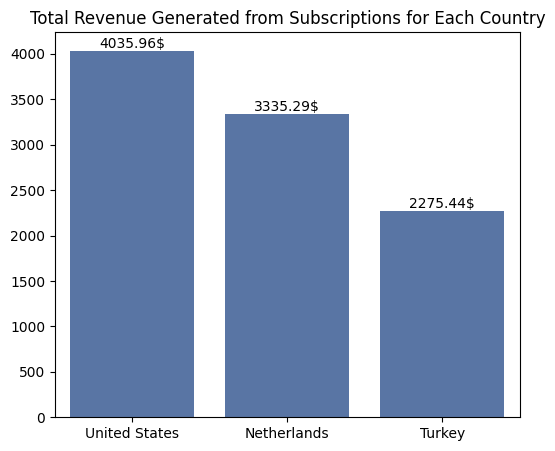

In [9]:
# Now, I will do the core tasks as requested in the task.
# 1. Calculate the total revenue generated from subscriptions for each country.


# To calculate the total revenue generated from subscriptions for each country, I will filter the events table for the purchase events and group by the country column from users table.
# First, I will find the free events
query = """
WITH free_events AS (
    SELECT DISTINCT event_name
    FROM user_events
    WHERE amount_usd IS NULL
),

-- Then, I will exclude free_events 
purchase_events AS (
    SELECT *
    FROM user_events
    WHERE event_name NOT IN (SELECT event_name FROM free_events)
),

-- Now, I will group by the user_id column and sum the amount_usd column
user_revenue AS (
    SELECT user_id, SUM(amount_usd) AS revenue
    FROM purchase_events
    GROUP BY user_id
)

-- Finally, I will join the user_revenue table with the users table and group by the country column
SELECT u.country, SUM(r.revenue) AS total_revenue
FROM user_revenue r
JOIN users u ON r.user_id = u.id
GROUP BY u.country
ORDER BY total_revenue DESC;
"""

# Let's transfer the SQL code that we wrote to the Python environment.
df_total_revenue = pd.read_sql_query(query, conn)
# We translate country codes into more descriptive names:
country_mapping = {'US': 'United States', 'NL': 'Netherlands', 'TR': 'Turkey'}

# We add a new column to the dataframe that contains the full names of the countries.
df_total_revenue['country_full'] = df_total_revenue['country'].map(country_mapping)

# Bar plot for total revenue generated from subscriptions for each country
plt.figure(figsize=(6, 5))
ax = sns.barplot(x='country_full', y='total_revenue', data=df_total_revenue,
                 order=df_total_revenue.sort_values('total_revenue', ascending=False)['country_full'])


ax.bar_label(ax.containers[0], labels=[f"{label:.2f}$" for label in ax.containers[0].datavalues]) # For every bar, we will show the exact values for better understanding.

plt.xlabel('')
plt.ylabel('')
plt.title('Total Revenue Generated from Subscriptions for Each Country')
plt.show()




<center><h1>Task 2</h1></center>

In [10]:
# Second Task
# 2. Calculate the total number of trials given to users who came from Instagram.
# To do this, firstly i will filter the users table for the users who came from Instagram. Then, Filter the events table for the trial purchase events and group by the user_id column
query = """
SELECT COUNT(DISTINCT e.user_id) AS total_trials
FROM user_events e
JOIN users u ON e.user_id = u.id
WHERE u.attribution_source = 'instagram'
  AND e.event_name = 'trial_started';
"""

# Let's check the total number of trials given to users who came from Instagram
df_total_trials = pd.read_sql_query(query, conn)
print("Total number of trials given to users who came from Instagram:")
print(df_total_trials['total_trials'].iloc[0])



Total number of trials given to users who came from Instagram:
210


<center><h1>Task 3</h1></center>

In [11]:
# Third Task
"""
3. Create a new column named 'acquisition_channel' by categorizing users based on their 'attribution_source':
   - 'Paid': users from instagram or tiktok
   - 'Organic': users from organic sources
"""
# To do this, I will create a new column named 'acquisition_channel' by categorizing users based on their 'attribution_source' column.
# If the attribution_source is 'instagram' or 'tiktok', the acquisition_channel will be 'Paid'. Otherwise, it will be 'Organic'.
users_df['acquisition_channel'] = np.where(users_df['attribution_source'].isin(['instagram', 'tiktok']), 'Paid', 'Organic')

# let's check the users table with the new column 'acquisition_channel'
print("\nUsers table preview with the new column 'acquisition_channel':")
display(users_df)


Users table preview with the new column 'acquisition_channel':


,id,created_at,attribution_source,country,name,acquisition_channel
0,1,2024-05-07,instagram,US,Eve Brown,Paid
1,2,2024-10-12,instagram,NL,Frank Moore,Paid
2,3,2024-10-15,tiktok,TR,Ivy Anderson,Paid
3,4,2024-08-28,tiktok,TR,Alice Brown,Paid
4,5,2024-04-03,organic,NL,Bob Moore,Organic
...,...,...,...,...,...,...
997,998,2025-02-01,instagram,TR,Bob Davis,Paid
998,999,2024-12-24,organic,NL,Charlie Davis,Organic
999,1000,2025-02-13,organic,NL,Jack Anderson,Organic
1000,1001,2025-02-16,instagram,US,Bruce Wayne,Paid


<center><h1>Task 4</h1></center>

In [12]:
# Forth Task
"""
4. Analyze the trial-to-subscription conversion rate:
   - Calculate the overall conversion rate
   - Break down the conversion rate by attribution_source
   
   A conversion rate records the percentage of users who have completed a desired action. Conversion rates are calculated by taking the total number of users who ‘convert’ 
   (for example, by clicking on an advertisement), dividing it by the overall size of the audience and converting that figure into a percentage.
   formula = (number of conversions / total number of visitors) * 100
"""

# Firstly, i should find a user who started trial then switched to subscription_started event.
# I will filter the events table for the trial_started and subscription_started events and group by the user_id column.
trial_started_events = events_df[events_df['event_name'] == 'trial_started']
subscription_started_events = events_df[events_df['event_name'] == 'subscription_started']

# Find the trial_started to subscription_started 'user_id's
converted_users = trial_started_events.merge(
    subscription_started_events, on='user_id', how='inner'
)['user_id'].unique()


# Calculate the overall conversion rate
overall_conversion_rate = len(converted_users) / users_df['id'].nunique() * 100

print("\nOverall conversion rate:")
print(f"{overall_conversion_rate:.2f}%")


# Break down the conversion rate by attribution_source, I have converted_users table who switched to trial_started to subscription_started event.
# let's use converted_users table, if users_df id's is in converted_users table, then make a new dataframe to store results.
converted_users_df = users_df[users_df['id'].isin(converted_users)]

# Group by the attribution_source column and count the number of users, this will be total number of users from source
conversion_rate_by_source = converted_users_df.groupby('attribution_source').size().reset_index(name='number_of_converted_users')

# Calculate the conversion rate by source
conversion_rate_by_source['conversion_rate'] = conversion_rate_by_source['number_of_converted_users'] / users_df.groupby('attribution_source').size().reset_index(name='total_number_of_users')['total_number_of_users'] * 100

# let's change the conversion_rate column to percentage for better understanding
conversion_rate_by_source['conversion_rate'] = conversion_rate_by_source['conversion_rate'].map(lambda x: f"{x:.2f}%")

print("\nConversion rate by attribution_source:")
display(conversion_rate_by_source)



Overall conversion rate:
48.00%

Conversion rate by attribution_source:


,attribution_source,number_of_converted_users,conversion_rate
0,instagram,149,48.69%
1,organic,169,49.13%
2,tiktok,163,46.31%


<center><h1>Task 5</h1></center>

In [13]:
# Fifth Task
""" 5. Calculate the median subscription duration (in months) for each country.

    In first, I have to find the subscription duration for each user. To do this, For each user, I simply subtract the subscription_started event's created_at with the subscription_cancelled event's created_at.
    Then, I will group by the user_id column with country and calculate the median subscription duration for each country.
"""

# I have subscription_started_events, I will check the users who cancelled the subscription.
cancelled_users = subscription_started_events.merge(
    events_df[events_df['event_name'] == 'subscription_cancelled'], on='user_id', how='inner'
)['user_id'].unique()
# This is the users who cancelled the subscription.

# Now, I will calculate the subscription duration for each user.
# Let's create new dataframe with user_id, started, cancelled, duration columns
subscription_duration = subscription_started_events[subscription_started_events['user_id'].isin(cancelled_users)].merge(
    events_df[events_df['event_name'] == 'subscription_cancelled'], on='user_id', how='inner'
)[['user_id', 'created_at_x', 'created_at_y']]
subscription_duration.columns = ['user_id', 'subscription_started', 'subscription_cancelled']

# Now let's add the duration column and be sure that our calculation in month
subscription_duration['duration'] = (
    (pd.to_datetime(subscription_duration['subscription_cancelled']).dt.year - 
     pd.to_datetime(subscription_duration['subscription_started']).dt.year) * 12 +
    (pd.to_datetime(subscription_duration['subscription_cancelled']).dt.month - 
     pd.to_datetime(subscription_duration['subscription_started']).dt.month)
)

# I will add the country column to the subscription_duration table to see users' countries
subscription_duration = subscription_duration.merge(users_df[['id', 'country']], left_on='user_id', right_on='id')
# drop id
subscription_duration.drop('id', axis=1, inplace=True)

# Now i will group by the country column and calculate the median subscription duration for each country
subscription_duration = subscription_duration.groupby('country')['duration'].median().reset_index()

display(subscription_duration)


,country,duration
0,NL,2.0
1,TR,2.0
2,US,2.0


<center><h1>Task 6</h1></center>

In [14]:
# Sixth Task
"""6. Calculate the Average Lifetime Value (LTV) by country
    
    Lifetime Value or LTV is an estimate of the average revenue that a customer will generate throughout their lifespan as a customer. 
    Formula:
        For Transactional Businesses:
            LTV = (Average Purchase Value) × (Average Purchase Frequency Rate) × (Average Customer Lifespan)
                Where:
                Average Purchase Value = Total Revenue ÷ Number of Orders
                Average Purchase Frequency Rate = Number of Orders ÷ Number of Unique Customers
                Average Customer Lifespan = Average period a customer continues to purchase

        For Subscription-Based Models:
            LTV = (Average Revenue per User [ARPU]) ÷ Churn Rate
            This formula assumes a steady stream of revenue and a predictable churn rate.

    In this case, I will use the Subscription-Based Models formula to calculate the Average Lifetime Value (LTV) by country. Because we are a subscription-based company.
"""
# I will find the average monthly amount expected from each customer per country.
# To do this, I will group by the user_id column. This will be the monthly revenue for each user. Kullanıcıların planlarına göre aylık getiri tablosu  oluşturacacğım

# I will create a new column named 'plan' based on the amount_usd column. If null free plan.
events_df['plan'] = np.where(events_df['amount_usd'].isnull(), 'Free', np.where(events_df['amount_usd'] == 4.99, 'Basic', np.where(events_df['amount_usd'] == 8.99, 'Essentials', 'Premium')))
# Let's check the events table with the new column 'plan'
users_events_df = users_df.merge(events_df, left_on='id', right_on='user_id')

def get_last_active_plan(events):
    """
        Parameters:
        events: DataFrame

        Returns:
        last_active_plan: str
    """
    # Sort the events by created_at column
    events = events.sort_values(by='created_at_y')
    # Find the index of the first subscription_cancelled event
    cancel_index = events[events['event_name'] == 'subscription_cancelled'].index.min()
    
    if pd.notnull(cancel_index):
        # Take the last active plan before the subscription_cancelled event
        last_active_plan = events.loc[:cancel_index - 1, 'plan'].iloc[-1]
    else:
        # If no subscription_cancelled event, take the last active plan
        last_active_plan = events['plan'].iloc[-1]
    
    return last_active_plan

# Find the last active plan for each user
last_plan_df = users_events_df.groupby('user_id').apply(get_last_active_plan).reset_index(name='last_active_plan')


# Make a new column named 'expected_return_monthly' based on the last_active_plan column
last_plan_df['expected_return_monthly'] = np.where(last_plan_df['last_active_plan'] == 'Free', 0, 
                                                   np.where(last_plan_df['last_active_plan'] == 'Basic', 4.99, 
                                                        np.where(last_plan_df['last_active_plan'] == 'Essentials', 8.99, 9.99)))

# Now i will group by the country column and calculate the average monthly amount expected from each customer per country
monthly_revenue = last_plan_df.merge(users_df[['id', 'country']], left_on='user_id', right_on='id')

# We will group by country and calculate the average monthly revenue
monthly_revenue = monthly_revenue.groupby('country')['expected_return_monthly'].mean().reset_index()

# Rearrange column names
monthly_revenue.columns = ['country', 'average_monthly_revenue']


# Calculate the churn rate as the number of users who cancelled the subscription divided by the total number of users per country

# I have cancelled_users dataframe which contains the users who cancelled the subscription.
# I will merge the cancelled_users table with the users table to get the country column.
cancelled_users_df = users_df[users_df['id'].isin(cancelled_users)]

# Group by the country column and count the number of users who cancelled the subscription
churn_rate = cancelled_users_df.groupby('country').size().reset_index(name='number_of_cancelled_users')

# I will merge the churn_rate table with the users table to get the total number of users per country
churn_rate = churn_rate.merge(users_df.groupby('country').size().reset_index(name='total_number_of_users'), on='country')

# Calculate the churn rate per country
churn_rate['churn_rate'] = (churn_rate['number_of_cancelled_users'] / churn_rate['total_number_of_users'])

# Now i will merge the monthly_revenue and churn_rate tables to calculate the Average Lifetime Value (LTV) by country
ltv = monthly_revenue.merge(churn_rate[['country', 'churn_rate']], on='country')


# Calculate the Average Lifetime Value (LTV) by country
ltv['life_time_value'] = (ltv['average_monthly_revenue'] / ltv['churn_rate'])

# I will write average_monthly_revenue rounded to 2 decimal places for better understanding
ltv['average_monthly_revenue'] = ltv['average_monthly_revenue'].map(lambda x: f"{x:.2f}$")

# I will write churn_rate as percent for better understanding
ltv['churn_rate'] = ltv['churn_rate'].map(lambda x: f"{x:.2%}")

# I will write ltv rounded to 2 decimal places for better understanding
ltv['life_time_value'] = ltv['life_time_value'].map(lambda x: f"{x:.2f}$")

# let's check the Average Lifetime Value (LTV) by country
print("\nAverage Lifetime Value (LTV) by country:")
display(ltv) 


Average Lifetime Value (LTV) by country:


,country,average_monthly_revenue,churn_rate,life_time_value
0,NL,4.35$,35.71%,12.18$
1,TR,2.41$,37.85%,6.37$
2,US,4.73$,37.06%,12.77$


<center><h1>BONUS 1</h1></center>

In [15]:
# BONUS DATA SCIENCE TASKS
"""7. Predict the churn probability for user #1002 (Clark Kent)
   - Use any relevant features from the dataset
   - Explain your model selection and feature engineering process
   - Provide confidence intervals if applicable
"""
# Let's examine his data.
user_1002_data = users_df[users_df['id'] == 1002]
print("\nUser #1002 (Clark Kent) data:")
display(user_1002_data)

# Display events of user #1002
user_1002_events = events_df[events_df['user_id'] == 1002]
print("\nUser #1002 (Clark Kent) events:")
display(user_1002_events)


User #1002 (Clark Kent) data:


,id,created_at,attribution_source,country,name,acquisition_channel
1001,1002,2025-02-16,organic,TR,Clark Kent,Organic



User #1002 (Clark Kent) events:


,id,created_at,user_id,event_name,amount_usd,plan
3485,3486,2025-02-25,1002,app_install,NaN,Free


In [16]:
# I will group for plans like if user pays 4.99 it means basic plan, 8.99 means essentials plan and 9.99 premium plan. Because of that i will create a new column named 'plan' based on the amount_usd column.

# Then if we do this we can actually look at the which user upgraded their plan.
# I will create a new column named 'plan' based on the amount_usd column. If null free plan.
events_df['plan'] = np.where(events_df['amount_usd'].isnull(), 'Free', np.where(events_df['amount_usd'] == 4.99, 'Basic', np.where(events_df['amount_usd'] == 8.99, 'Essentials', 'Premium')))
# Let's check the events table with the new column 'plan'
print("\nUser events table preview with the new column 'plan':")
display(events_df)



User events table preview with the new column 'plan':


,id,created_at,user_id,event_name,amount_usd,plan
0,1,2024-05-07,1,app_install,NaN,Free
1,2,2024-05-12,1,trial_started,NaN,Free
2,3,2024-05-24,1,trial_cancelled,NaN,Free
3,4,2024-10-12,2,app_install,NaN,Free
4,5,2024-10-13,2,trial_started,NaN,Free
...,...,...,...,...,...,...
3481,3482,2025-02-25,1000,trial_cancelled,NaN,Free
3482,3483,2025-02-25,1001,app_install,NaN,Free
3483,3484,2025-02-25,1001,trial_started,NaN,Free
3484,3485,2025-02-25,1001,subscription_started,9.99,Premium


In [17]:
# Let's check if any user changed his plan
# I will filter the events table for the users who changed their plan and group by the user_id column.
changed_plan_users = events_df[events_df['event_name'] == 'subscription_started'].groupby('user_id')['plan'].nunique()
changed_plan_users = changed_plan_users[changed_plan_users >
                                      1].reset_index()['user_id'].unique()

# Let's check the users who changed their plan
print("\nUsers who changed their plan:")
print(changed_plan_users)

# That's bad nobody changed his plan.


Users who changed their plan:
[]


In [18]:
# I will take a look at if the user have been tried the trial version of the app then purchased the subscription.
# I will filter the events table for the users who started the trial and purchased the subscription.
trial_started_users = events_df[events_df['event_name'] == 'trial_started']['user_id'].unique() 
subscription_started_users = events_df[events_df['event_name'] == 'subscription_started']['user_id'].unique()
trial_to_subscription_users = np.intersect1d(trial_started_users, subscription_started_users)

# Let's check the users who started the trial and purchased the subscription
print("\nUsers who started the trial and purchased the subscription:")
print(trial_to_subscription_users)

# Let's check the users who didn't try the trial and purchased the subscription
# I will filter the users who didn't start the trial and purchased the subscription.
trial_not_started_users = np.setdiff1d(subscription_started_users, trial_started_users)

# Let's check the users who didn't start the trial and purchased the subscription
print("\nUsers who didn't start the trial and purchased the subscription:")
print(trial_not_started_users)

# So none of them directly purchased the subscription without trying the trial version of the app.


Users who started the trial and purchased the subscription:
[   2    3    8    9   10   12   13   14   16   17   22   24   27   28
   35   36   37   38   39   40   41   46   48   50   52   54   55   57
   59   61   63   64   68   72   73   74   75   76   83   85   86   89
   90   93   95   96   97   99  100  102  106  110  113  115  116  117
  118  119  124  126  132  133  135  138  139  144  145  146  149  152
  153  154  158  159  160  161  162  164  166  167  169  172  174  175
  176  177  179  181  183  185  186  189  190  191  195  196  197  198
  200  204  206  208  209  211  212  213  214  217  218  221  222  223
  225  226  234  236  237  239  240  241  242  243  244  247  248  250
  254  257  259  260  262  265  267  269  272  273  274  276  277  279
  280  281  283  284  286  289  290  292  293  295  298  300  303  304
  309  311  312  316  320  321  322  323  325  326  327  331  332  336
  339  345  348  350  355  356  358  359  360  361  362  363  365  366
  370  371  372 

In [28]:
# I will create user-level summary datatable.
# I will group each user based on their actions if user has done this event it will show 1 or 0. Because it will help to model.
# Since no user has upgraded their account, I can also simply write his plan as in a column. I will not add amount_usd because we are using plans and events in this model. Like if a event happened and the plan this.
# Then user churned because of this. We will actually say the total amount of money indirectly.
# Let's merge the events and users dataset in first.
users_events_df = users_df.merge(events_df, left_on='id', right_on='user_id')


# Find the plans for each user using get_last_active_plan function that we defined before.
last_plan_df = users_events_df.groupby('user_id').apply(get_last_active_plan).reset_index(name='last_active_plan')

# I will group by the user_id column and count the number of each event for each user.
def aggregate_events(events):
    """
        Parameters:
        events: DataFrame

        Returns:
        summary: dict
    """
    event_counts = events['event_name'].value_counts()
    summary = {
        'app_install': int('app_install' in event_counts),
        'trial_started': int('trial_started' in event_counts),
        'trial_cancelled': int('trial_cancelled' in event_counts),
        'subscription_started': int('subscription_started' in event_counts),
        'subscription_renewed': event_counts.get('subscription_renewed', 0),
        'subscription_cancelled': int('subscription_cancelled' in event_counts),
    }
    return summary

# Group by the user_id column and count the number of each event for each user
summary_df = users_events_df.groupby('user_id').apply(aggregate_events).apply(pd.Series).reset_index()

# Merge the last_plan_df with the summary_df
summary_df = summary_df.merge(last_plan_df, on='user_id', how='left')

# Add the user information to the summary_df
user_info_df = users_events_df.drop_duplicates(subset='user_id')[['user_id', 'attribution_source', 'country', 'name', 'acquisition_channel']]
summary_df = summary_df.merge(user_info_df, on='user_id', how='left')

# Arrange the columns
summary_df = summary_df[['user_id', 'attribution_source', 'country', 'name', 'acquisition_channel', 
                         'app_install', 'trial_started', 'trial_cancelled', 
                         'subscription_started', 'subscription_renewed', 'subscription_cancelled', 'last_active_plan']]

# Let's check the user-level summary datatable
print("\nUser-level summary datatable:")
display(summary_df)




User-level summary datatable:


,user_id,attribution_source,country,name,acquisition_channel,app_install,trial_started,trial_cancelled,subscription_started,subscription_renewed,subscription_cancelled,last_active_plan
0,1,instagram,US,Eve Brown,Paid,1,1,1,0,0,0,Free
1,2,instagram,NL,Frank Moore,Paid,1,1,0,1,3,1,Essentials
2,3,tiktok,TR,Ivy Anderson,Paid,1,1,0,1,3,1,Basic
3,4,tiktok,TR,Alice Brown,Paid,1,1,1,0,0,0,Free
4,5,organic,NL,Bob Moore,Organic,1,0,0,0,0,0,Free
...,...,...,...,...,...,...,...,...,...,...,...,...
997,998,instagram,TR,Bob Davis,Paid,1,0,0,0,0,0,Free
998,999,organic,NL,Charlie Davis,Organic,1,1,0,1,2,1,Essentials
999,1000,organic,NL,Jack Anderson,Organic,1,1,1,0,0,0,Free
1000,1001,instagram,US,Bruce Wayne,Paid,1,1,0,1,0,0,Premium


In [23]:
# Now we can use this user-level summary datatable to train our model.
"""
    In my research, industry generally use logistic regression as baseline models but methods like random forest and gradient boosting (e.g., XGBoost, LightGBM) are very popular for churn prediction.

    We will try all of them to find best accuracy in our case.
"""

# Let's start with baseline model (logistic regression)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# I will use the summary_df table to train the model.
# I will drop the user_id, name columns because they are not important for the model.
X = summary_df.drop(['user_id', 'name'], axis=1)
# and we will predict if user subscription_cancelled or not.
y = X.pop('subscription_cancelled')

# I will use one-hot encoding for categorical columns
X = pd.get_dummies(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the test set
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)

# Compare predictions with probability estimates
for i, (pred, prob) in enumerate(zip(predictions, probabilities)):
    print(f"Sample {i+1}: Predicted Class = {pred}, Class 0 Probability = {prob[0]:.4f}, Class 1 Probability = {prob[1]:.4f}")



Sample 1: Predicted Class = 1, Class 0 Probability = 0.0512, Class 1 Probability = 0.9488
Sample 2: Predicted Class = 1, Class 0 Probability = 0.0515, Class 1 Probability = 0.9485
Sample 3: Predicted Class = 0, Class 0 Probability = 0.9977, Class 1 Probability = 0.0023
Sample 4: Predicted Class = 0, Class 0 Probability = 0.9974, Class 1 Probability = 0.0026
Sample 5: Predicted Class = 1, Class 0 Probability = 0.0001, Class 1 Probability = 0.9999
Sample 6: Predicted Class = 0, Class 0 Probability = 0.9977, Class 1 Probability = 0.0023
Sample 7: Predicted Class = 1, Class 0 Probability = 0.0530, Class 1 Probability = 0.9470
Sample 8: Predicted Class = 0, Class 0 Probability = 0.9969, Class 1 Probability = 0.0031
Sample 9: Predicted Class = 1, Class 0 Probability = 0.0001, Class 1 Probability = 0.9999
Sample 10: Predicted Class = 0, Class 0 Probability = 0.9974, Class 1 Probability = 0.0026
Sample 11: Predicted Class = 0, Class 0 Probability = 0.9975, Class 1 Probability = 0.0025
Sample 1

In [ ]:
# Let's predict our case:
import numpy as np
import pandas as pd

# Extract Clark Kent's user data and events
user_1002_data = users_df[users_df['id'] == 1002]
user_1002_events = events_df[events_df['user_id'] == 1002]

# Add the 'plan' column based on 'amount_usd'
user_1002_events['plan'] = np.where(user_1002_events['amount_usd'].isnull(), 'Free',
                                     np.where(user_1002_events['amount_usd'] == 4.99, 'Basic',
                                              np.where(user_1002_events['amount_usd'] == 8.99, 'Essentials', 'Premium')))

users_1002_events_df = user_1002_data.merge(user_1002_events, left_on='id', right_on='user_id')

# Get the last active plan for Clark Kent
last_active_plan = get_last_active_plan(users_1002_events_df)

# Aggregate Clark Kent's events
user_1002_summary = aggregate_events(user_1002_events)

# Combine user-level summary and last active plan
user_1002_summary['last_active_plan'] = last_active_plan
user_1002_summary['user_id'] = 1002
user_1002_summary['attribution_source'] = user_1002_data['attribution_source'].iloc[0]
user_1002_summary['country'] = user_1002_data['country'].iloc[0]
user_1002_summary['name'] = user_1002_data['name'].iloc[0]
user_1002_summary['acquisition_channel'] = user_1002_data['acquisition_channel'].iloc[0]


# Convert to DataFrame for prediction
user_1002_df = pd.DataFrame([user_1002_summary])

# Preprocessing for prediction (one-hot encoding)
user_1002_df_encoded = pd.get_dummies(user_1002_df.drop(['user_id', 'name'], axis=1))

# Add missing columns from X_test to user_1002_df_encoded with value 0
for col in X_test.columns:
    if col not in user_1002_df_encoded.columns:
        user_1002_df_encoded[col] = 0

# Drop any extra columns in user_1002_df_encoded that are not in X_test
user_1002_df_encoded = user_1002_df_encoded[X_test.columns]

# Make a prediction
churn_predict = model.predict(user_1002_df_encoded)
churn_probability = model.predict_proba(user_1002_df_encoded)

# Print the churn probability
print("\nPrediction for user #1002 (Clark Kent) with Logistic Regression:")
# Compare predictions with probability estimates
for i, (pred, prob) in enumerate(zip(churn_predict, churn_probability)):
    print(f"user #1002 (Clark Kent): Predicted Class = {pred}, Not Churned Probability = {prob[0]:.4f}, Churn Probability = {prob[1]:.4f}")

# The bootstrap method retrains our model by repeatedly sampling from the training data. In this way, we obtain the distribution of values ​​predicted by the model.
# We can use this distribution to calculate confidence intervals for the predicted probability of churn for user #1002 (Clark Kent).
# Set number of bootstrap iterations
n_iterations = 1000
bootstrap_results = []

# Loop to perform bootstrap resampling and model fitting
for _ in range(n_iterations):
    # Resample with replacement from the training set
    indices = np.random.choice(range(len(X_train)), size=len(X_train), replace=True)
    X_train_bootstrap = X_train.iloc[indices]
    y_train_bootstrap = y_train.iloc[indices]
    
    # Train the logistic regression model on the bootstrap sample
    model.fit(X_train_bootstrap, y_train_bootstrap)
    
    # Predict the probability for the user data (Clark Kent)
    prob = model.predict_proba(user_1002_df_encoded)[:, 1][0]  # Get probability for churn (class 1)
    bootstrap_results.append(prob)

# Convert results to a numpy array for percentile calculation
bootstrap_results = np.array(bootstrap_results)

# Calculate the 2.5th and 97.5th percentiles to form the confidence interval
lower_percentile = np.percentile(bootstrap_results, 2.5)
upper_percentile = np.percentile(bootstrap_results, 97.5)

# Get the final predicted probability from the original model
final_prediction = model.predict_proba(user_1002_df_encoded)[:, 1][0]

# Print the results
print("\nChurn probability for user #1002 (Clark Kent) with Logistic Regression:")
print(f"Predicted Probability: {final_prediction:.4f}")
print(f"Confidence Interval: ({lower_percentile:.4f}, {upper_percentile:.4f})")

# The logistic regression model predicts that Clark Kent has a churn probability of approximately 0.0022 , and the 95% CI is (0.0019, 0.0029).
# If we repeated the entire process (training the model on different bootstrap samples) many times, 
# The CI is very narrow (only 0.0010 wide), which is wider than xgboost
# 95% of the time the churn probability for Clark Kent would fall between 0.0019 and 0.0029.


Prediction for user #1002 (Clark Kent) with Logistic Regression:
user #1002 (Clark Kent): Predicted Class = 0, Not Churned Probability = 0.9977, Churn Probability = 0.0023

Churn probability for user #1002 (Clark Kent) with Logistic Regression:
Predicted Probability: 0.0022
Confidence Interval: (0.0019, 0.0029)


In [37]:
# Incredibly, baseline model works very well. But we can try other models.
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train the random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict the test set
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)

# Compare predictions with probability estimates
for i, (pred, prob) in enumerate(zip(rf_predictions, rf_probabilities)):
    print(f"Sample {i+1}: Predicted Class = {pred}, Class 0 Probability = {prob[0]:.4f}, Class 1 Probability = {prob[1]:.4f}")

# Predict user #1002 with random forest model
rf_churn_predict = rf_model.predict(user_1002_df_encoded)
rf_churn_probability = rf_model.predict_proba(user_1002_df_encoded)

# Print the churn probability
print("\nChurn probability for user #1002 (Clark Kent) with Random Forest:")
# Compare predictions with probability estimates
for i, (pred, prob) in enumerate(zip(rf_churn_predict, rf_churn_probability)):
    print(f"user #1002 (Clark Kent): Predicted Class = {pred}, Not Churned Probability = {prob[0]:.4f}, Churn Probability = {prob[1]:.4f}")
# Bootstrap method to get confidence intervals
n_iterations = 1000
bootstrap_results = []

for _ in range(n_iterations):
    # Sample with replacement from the training set
    indices = np.random.choice(range(len(X_train)), size=len(X_train), replace=True)
    
    # Use iloc to index the rows (not the columns)
    X_train_bootstrap = X_train.iloc[indices]
    y_train_bootstrap = y_train.iloc[indices]  # Assuming y_train is a pandas Series

    # Fit the model on the bootstrap sample
    rf_model.fit(X_train_bootstrap, y_train_bootstrap)

    # Predict the probabilities on the original input data
    bootstrap_results.append(rf_model.predict_proba(X)[:, 1])

# Calculate the confidence intervals
lower_percentile = np.percentile(bootstrap_results, 2.5, axis=0)
upper_percentile = np.percentile(bootstrap_results, 97.5, axis=0)

print(f"Predicted Probability: {rf_churn_probability}")
print(f"Confidence Interval: ({lower_percentile[0]}, {upper_percentile[0]})")
# As we can see from the probability results of the Random Forest model, probabilities are more accurate.
# The results of confidence interval indicates that the Random Forest model is extremely confident that Clark Kent will not churn.

Sample 1: Predicted Class = 1, Class 0 Probability = 0.0000, Class 1 Probability = 1.0000
Sample 2: Predicted Class = 1, Class 0 Probability = 0.0000, Class 1 Probability = 1.0000
Sample 3: Predicted Class = 0, Class 0 Probability = 1.0000, Class 1 Probability = 0.0000
Sample 4: Predicted Class = 0, Class 0 Probability = 1.0000, Class 1 Probability = 0.0000
Sample 5: Predicted Class = 1, Class 0 Probability = 0.0000, Class 1 Probability = 1.0000
Sample 6: Predicted Class = 0, Class 0 Probability = 1.0000, Class 1 Probability = 0.0000
Sample 7: Predicted Class = 1, Class 0 Probability = 0.0000, Class 1 Probability = 1.0000
Sample 8: Predicted Class = 0, Class 0 Probability = 1.0000, Class 1 Probability = 0.0000
Sample 9: Predicted Class = 1, Class 0 Probability = 0.0000, Class 1 Probability = 1.0000
Sample 10: Predicted Class = 0, Class 0 Probability = 1.0000, Class 1 Probability = 0.0000
Sample 11: Predicted Class = 0, Class 0 Probability = 1.0000, Class 1 Probability = 0.0000
Sample 1

In [38]:
# XGBoost
from xgboost import XGBClassifier

# Train the XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict the test set
xgb_predictions = xgb_model.predict(X_test)
xgb_probabilities = xgb_model.predict_proba(X_test)

# Compare predictions with probability estimates
for i, (pred, prob) in enumerate(zip(xgb_predictions, xgb_probabilities)):
    print(f"Sample {i+1}: Predicted Class = {pred}, Class 0 Probability = {prob[0]:.4f}, Class 1 Probability = {prob[1]:.4f}")

# Predict user #1002 with XGBoost model
xgb_churn_predict = xgb_model.predict(user_1002_df_encoded)
xgb_churn_probability = xgb_model.predict_proba(user_1002_df_encoded)

# Print the churn probability
print("\nChurn probability for user #1002 (Clark Kent) with XGBoost:")
# Compare predictions with probability estimates
for i, (pred, prob) in enumerate(zip(xgb_churn_predict, xgb_churn_probability)):
    print(f"user #1002 (Clark Kent): Predicted Class = {pred}, Not Churned Probability = {prob[0]:.4f}, Churn Probability = {prob[1]:.4f}")

# Bootstrap method to get confidence intervals for XGBoost
n_iterations = 1000
bootstrap_results_xgb = []

for _ in range(n_iterations):
    # Sample with replacement from the training set
    indices = np.random.choice(range(len(X_train)), size=len(X_train), replace=True)
    X_train_bootstrap = X_train.iloc[indices]
    y_train_bootstrap = y_train.iloc[indices]

    # Fit the XGBoost model on the bootstrap sample
    xgb_model.fit(X_train_bootstrap, y_train_bootstrap)

    # Predict the probabilities on the original input data
    bootstrap_results_xgb.append(xgb_model.predict_proba(user_1002_df_encoded)[:, 1])

# Calculate the confidence intervals for XGBoost
lower_percentile_xgb = np.percentile(bootstrap_results_xgb, 2.5)
upper_percentile_xgb = np.percentile(bootstrap_results_xgb, 97.5)

# Print the predicted probability and confidence interval for XGBoost
print(f"Predicted Probability for XGBoost: {xgb_churn_probability[0][1]:.4f}")
print(f"Confidence Interval: ({lower_percentile_xgb:.4f}, {upper_percentile_xgb:.4f})")
#  The interval is extremely narrow (just 0.03 percentage points wide), which suggests that the prediction is very stable and robust across different samples. 
# This is typically a good sign, indicating low variability in the model's predictions.
# Suprisingly, XGBoost model probality results are not as good as Random Forest model. But still it is better than Logistic Regression model.

Sample 1: Predicted Class = 1, Class 0 Probability = 0.0029, Class 1 Probability = 0.9971
Sample 2: Predicted Class = 1, Class 0 Probability = 0.0029, Class 1 Probability = 0.9971
Sample 3: Predicted Class = 0, Class 0 Probability = 0.9983, Class 1 Probability = 0.0017
Sample 4: Predicted Class = 0, Class 0 Probability = 0.9983, Class 1 Probability = 0.0017
Sample 5: Predicted Class = 1, Class 0 Probability = 0.0029, Class 1 Probability = 0.9971
Sample 6: Predicted Class = 0, Class 0 Probability = 0.9983, Class 1 Probability = 0.0017
Sample 7: Predicted Class = 1, Class 0 Probability = 0.0029, Class 1 Probability = 0.9971
Sample 8: Predicted Class = 0, Class 0 Probability = 0.9983, Class 1 Probability = 0.0017
Sample 9: Predicted Class = 1, Class 0 Probability = 0.0029, Class 1 Probability = 0.9971
Sample 10: Predicted Class = 0, Class 0 Probability = 0.9983, Class 1 Probability = 0.0017
Sample 11: Predicted Class = 0, Class 0 Probability = 0.9983, Class 1 Probability = 0.0017
Sample 1

In [ ]:
# From our models, we can clearly see user #1002 (Clark Kent) will not churn based on the given data.

<center><h1>BONUS 2</h1></center>

In [39]:
"""8. Predict the potential Lifetime Value (pLTV) for user #1001 (Bruce Wayne)
   - Explain your methodology and assumptions

   Potential Lifetime Value (pLTV) is a key metric that estimates the total revenue a customer could potentially generate over the course of their relationship with a company.
   Formula = (Average Revenue Per User) * Average Customer Lifetime (in months)

   Since we have the users plan, we have to calculate Average Customer Lifetime to calculate pLTV's.
"""
# Let's calculate the Average Customer Lifetime, we can use the subscription duration for each user. We calculated the median subscription duration for each country in the fifth task.
# In similarly we can use subscription_duration table to find subscription duration for every user.


subscription_duration = subscription_started_events[subscription_started_events['user_id'].isin(cancelled_users)].merge(
    events_df[events_df['event_name'] == 'subscription_cancelled'], on='user_id', how='inner'
)[['user_id', 'created_at_x', 'created_at_y']]
subscription_duration.columns = ['user_id', 'subscription_started', 'subscription_cancelled']

# Now let's add the duration column and be sure that our calculation in month
subscription_duration['duration'] = (
    (pd.to_datetime(subscription_duration['subscription_cancelled']).dt.year - 
     pd.to_datetime(subscription_duration['subscription_started']).dt.year) * 12 +
    (pd.to_datetime(subscription_duration['subscription_cancelled']).dt.month - 
     pd.to_datetime(subscription_duration['subscription_started']).dt.month)
)

# Now let's find the average customer lifetime, we simply take the average of duration column.
average_customer_lifetime = subscription_duration['duration'].mean()
print("\nAverage Customer Lifetime (in months):")
print(average_customer_lifetime)


Average Customer Lifetime (in months):
2.5243243243243243


In [40]:
# As we can see in this dataset our users' average lifetime 2.5 months. So we can use this value to calculate pLTV.
# Now we can calculate the potential Lifetime Value (pLTV) for user #1001 (Bruce Wayne).

summary_df_bruce = summary_df[summary_df['user_id'] == 1001]

# Let's take a look at bruce wayne's plan.
print(f"Bruce Wayne's plan: {summary_df_bruce['last_active_plan'].iloc[0]}")

# We will define a dictionary to map the plan.
plan_map = {
    'Free': 0,
    'Basic': 4.99,
    'Essentials': 8.99,
    'Premium': 9.99
}

# Now we have everything to calculate pLTV.
bruce_wayne_arpu = plan_map[summary_df_bruce['last_active_plan'].iloc[0]]
pLTV = bruce_wayne_arpu * average_customer_lifetime

print("\nPotential Lifetime Value (pLTV) for user #1001 (Bruce Wayne):")
print(f"${pLTV:.2f}")

Bruce Wayne's plan: Premium

Potential Lifetime Value (pLTV) for user #1001 (Bruce Wayne):
$25.22


In [41]:
# Lets Check for Charlie Smith with #39 user_id and his plan is basic.
summary_df_charlie = summary_df[summary_df['user_id'] == 39]

print(f"Charlie Smith's plan: {summary_df_charlie['last_active_plan'].iloc[0]}")

charlie_smith_arpu = plan_map[summary_df_charlie['last_active_plan'].iloc[0]]

pLTV_charlie = charlie_smith_arpu * average_customer_lifetime

print("\nPotential Lifetime Value (pLTV) for user #39 (Charlie Smith):")
print(f"${pLTV_charlie:.2f}")

# As we can see from the results, the potential Lifetime Value (pLTV) can change depends on the user's plan.

Charlie Smith's plan: Basic

Potential Lifetime Value (pLTV) for user #39 (Charlie Smith):
$12.60
